<h1>
importing data

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

import os
import random
import matplotlib.pyplot as plt
import warnings

import cv2 as cv
from sklearn.utils import shuffle
import numpy as np
from keras.utils import np_utils


warnings.simplefilter(action='ignore', category=FutureWarning)

In [94]:
# physical_device = tf.config.experimental.list_physical_devices()
# print('Num GPUs Available: ',len(physical_device))
# tf.config.experimental.set_memory_growth(physical_device[2],True)

<h1>
Data Preparation

In [2]:
def equalize_classes(_path):
    _C0 = list(os.scandir(_path+'/C0'))
    _C1 = list(os.scandir(_path+'/C1'))
    while True:
        _C0 = list(os.scandir(_path+'/C0'))
        if len(_C1)==len(_C0):
            break
        else:
            for c in random.sample(_C0,1):
                os.remove(c)
def read_from_path(_path):
    
    data_x = []
    data_y = []
    
    for p in _path:
        _C0 = os.listdir(p+'/C0')
        _C1 = os.listdir(p+'/C1')
        temp_data_x = []
        temp_data_y = []

        for f in _C0:
            full_name = p+'/C0/'+f
            img = (np.array(cv.imread(full_name,0) ,dtype=np.uint8).astype('float32')/255)
            temp_data_x.append(img)
            temp_data_y.append(0)

        for f in _C1:
            full_name = p+'/C1/'+f
            img = (np.array(cv.imread(full_name,0) ,dtype=np.uint8).astype('float32')/255)
            temp_data_x.append(img)
            temp_data_y.append(1)
        
        data_x += temp_data_x
        data_y += temp_data_y

    data_x,data_y = shuffle(data_x,data_y)

    return np.array(data_x),np.array(data_y)

In [3]:
for i in range(1,4):
    equalize_classes('labeling/data/frame_1_{:02d}_data_16'.format(i))


train_path = ['labeling/data/frame_1_01_data_16',\
            #   'labeling/data/frame_1_02_data_16',\
              'labeling/data/frame_1_03_data_16']

valid_path = ['labeling/data/frame_1_02_data_16']

In [4]:
train_data_x,train_data_y = read_from_path(train_path)
valid_data_x,valid_data_y = read_from_path(valid_path)

In [6]:
shape = np.shape(train_data_x)
train_data_x = np.reshape(train_data_x,(shape[0],16,16,1))
print(train_data_x.shape)

shape = np.shape(valid_data_x)
valid_data_x = np.reshape(valid_data_x,(shape[0],16,16,1))
print(valid_data_x.shape)

# shape = np.shape(test_data_x)
# test_data_x = np.reshape(test_data_x,(shape[0],16,16,1))


(104, 16, 16, 1)
(42, 16, 16, 1)


In [7]:
n_classes = 2
print("Shape before one-hot encoding: ", train_data_y.shape,valid_data_y.shape,)

if train_data_y.shape==(train_data_y.shape[0],):
    train_data_y = np_utils.to_categorical(train_data_y, n_classes)

if valid_data_y.shape==(valid_data_y.shape[0],):
    valid_data_y = np_utils.to_categorical(valid_data_y, n_classes)

print("Shape after one-hot encoding: ", train_data_y.shape,valid_data_y.shape)

Shape before one-hot encoding:  (104,) (42,)
Shape after one-hot encoding:  (104, 2) (42, 2)


In [8]:
def plotImages(images,labels):
    fig, axes=plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images,axes):
        ax.imshow(img,cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

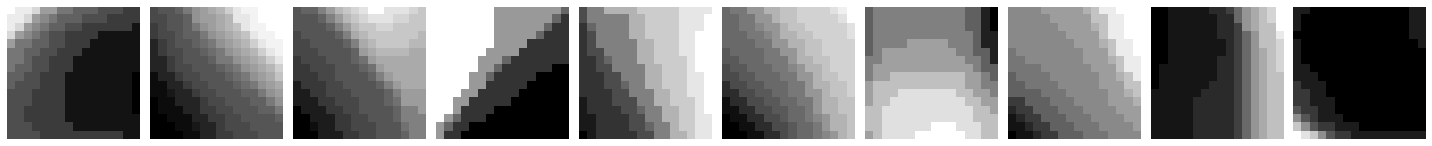

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [9]:
plotImages(train_data_x[0:10],train_data_y[0:10])
print(train_data_y[0:10])

In [3]:

from tensorflow.keras.models import load_model
model = load_model('models/_vn_32_64_8_100_94.h5')


# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(16,16,1)))
# model.add(MaxPool2D(pool_size=(1,1)))
# model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(16,16,8)))
# model.add(Flatten())
# model.add(Dense(200, activation='relu'))
# model.add(Dense(2, activation='softmax'))

# # compiling the sequential model
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                        

In [12]:
model.fit(train_data_x, train_data_y, batch_size=5, epochs=5, validation_data=(valid_data_x, valid_data_y))

Epoch 1/5
21/21 [==============================] - 1s 25ms/step - loss: 0.7081 - accuracy: 0.4808 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
21/21 [==============================] - 0s 19ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/5
21/21 [==============================] - 0s 19ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
21/21 [==============================] - 0s 18ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
21/21 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [12]:
# if os.path.isfile('models/_vn1.h5') is False:
model.save('models/_vn_32_128_8_200_94_retrain.h5')